In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from ISLP.models import summarize
import warnings
warnings.filterwarnings('ignore')

In [43]:
merged_data = pd.read_csv('../data/processed/merged_data.csv')

print(merged_data.describe(include='all'))

print(merged_data.info())

       Province_x Month-Year  Unemployment Rate Minimum Wage
count        6391       6391        6391.000000         6086
unique         11        581                NaN          174
top        Canada   Jan-1976                NaN        $4.00
freq          581         11                NaN          395
mean          NaN        NaN           9.095634          NaN
std           NaN        NaN           3.503424          NaN
min           NaN        NaN           3.200000          NaN
25%           NaN        NaN           6.500000          NaN
50%           NaN        NaN           8.400000          NaN
75%           NaN        NaN          11.200000          NaN
max           NaN        NaN          22.700000          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Province_x         6391 non-null   object 
 1   Month-Year   

In [44]:
merged_data = pd.read_csv('../data/processed/merged_data.csv')

# ensure datatype is correct
merged_data['Minimum Wage'] = merged_data['Minimum Wage'].replace('[\$,]', '', regex=True).astype(float)
merged_data['Unemployment Rate'] = merged_data['Unemployment Rate'].astype(float)


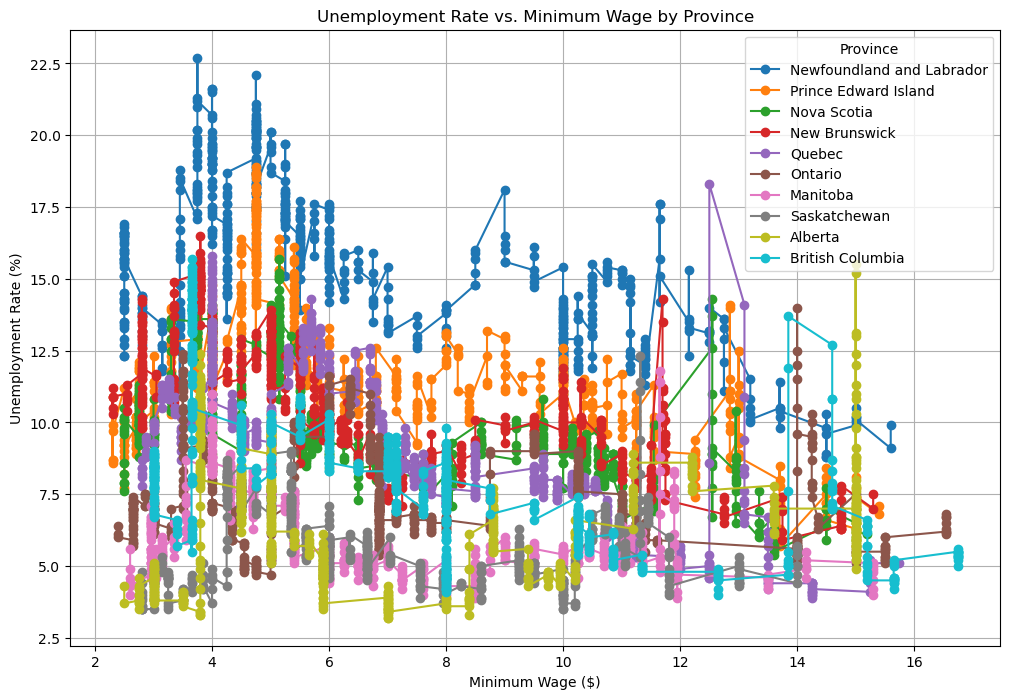

In [45]:

# lets see the plots first
plt.figure(figsize=(12, 8))
for province in merged_data['Province_x'].unique():
    if province != 'Canada': # drop Canada data point from the plot
        province_data = merged_data[merged_data['Province_x'] == province]
        plt.plot(province_data['Minimum Wage'], province_data['Unemployment Rate'], marker='o', label=province)

plt.xlabel('Minimum Wage ($)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Minimum Wage by Province')
plt.legend(title='Province')
plt.grid(True)
plt.show()

#it's not very linear, let's test

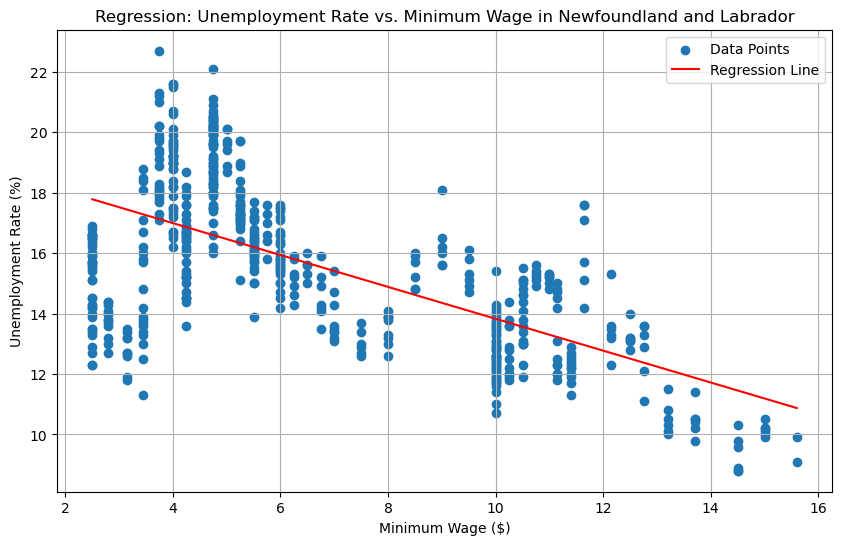

                 coef  std err       t  P>|t|
const         19.1033    0.197  96.844    0.0
Minimum Wage  -0.5275    0.026 -19.952    0.0


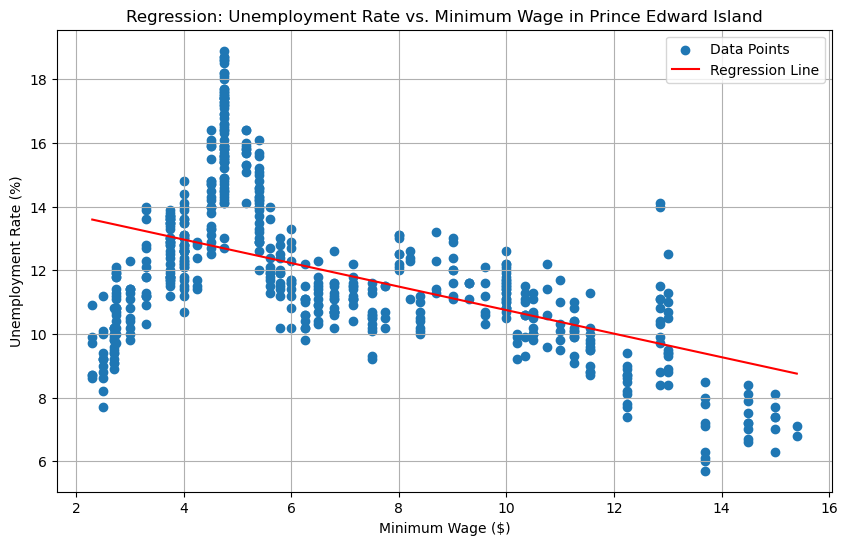

                 coef  std err       t  P>|t|
const         14.4442    0.196  73.561    0.0
Minimum Wage  -0.3696    0.026 -14.265    0.0


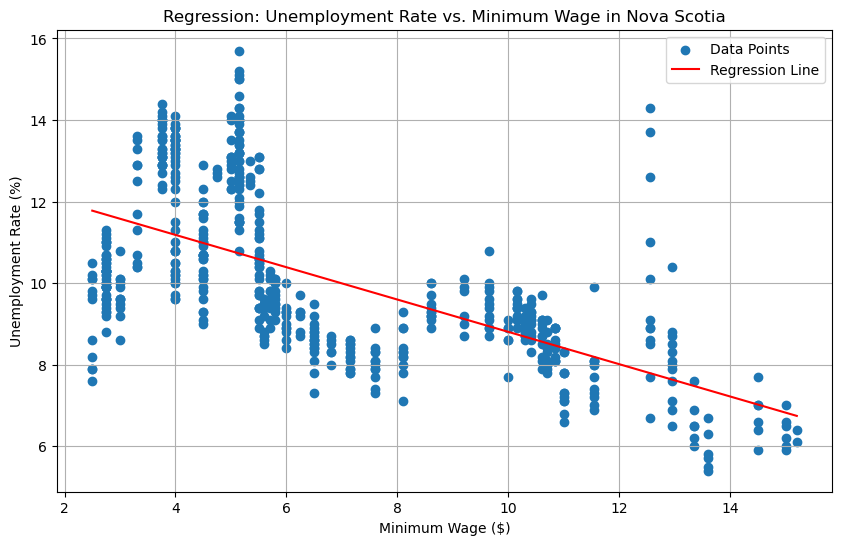

                 coef  std err       t  P>|t|
const         12.7686    0.153  83.654    0.0
Minimum Wage  -0.3963    0.020 -19.667    0.0


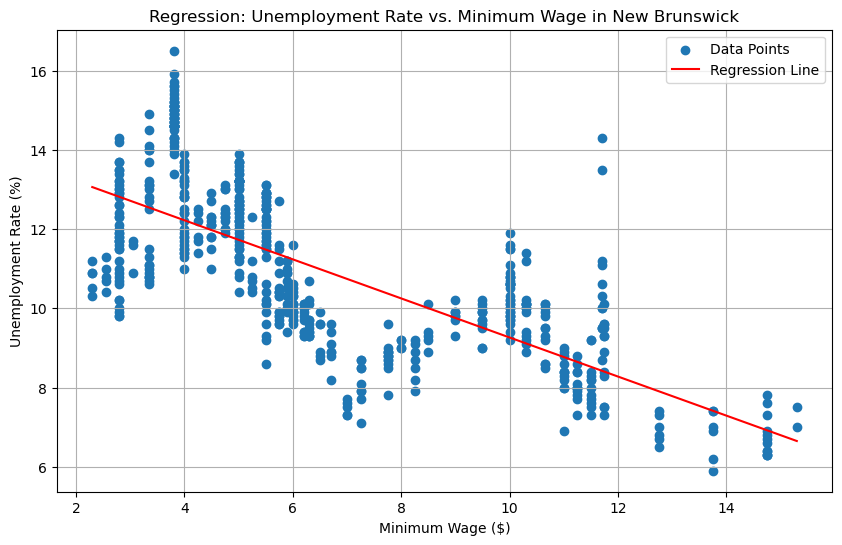

                 coef  std err        t  P>|t|
const         14.1931    0.140  101.048    0.0
Minimum Wage  -0.4930    0.019  -26.014    0.0


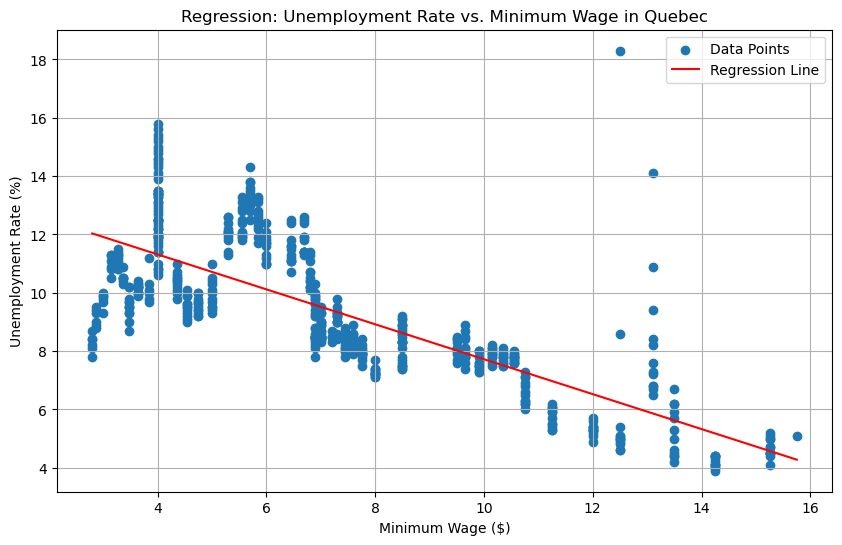

                 coef  std err       t  P>|t|
const         13.7121    0.166  82.391    0.0
Minimum Wage  -0.5989    0.021 -28.978    0.0


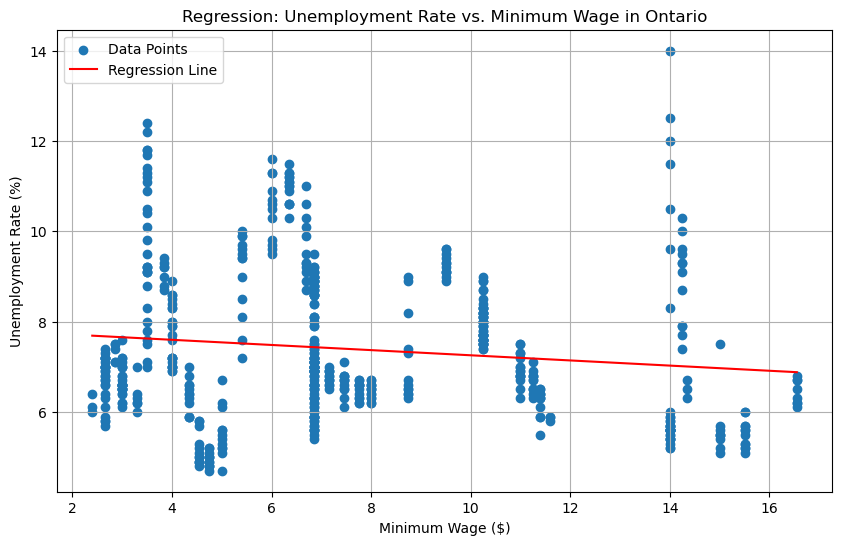

                coef  std err      t  P>|t|
const         7.8275    0.154  50.96  0.000
Minimum Wage -0.0571    0.018  -3.15  0.002


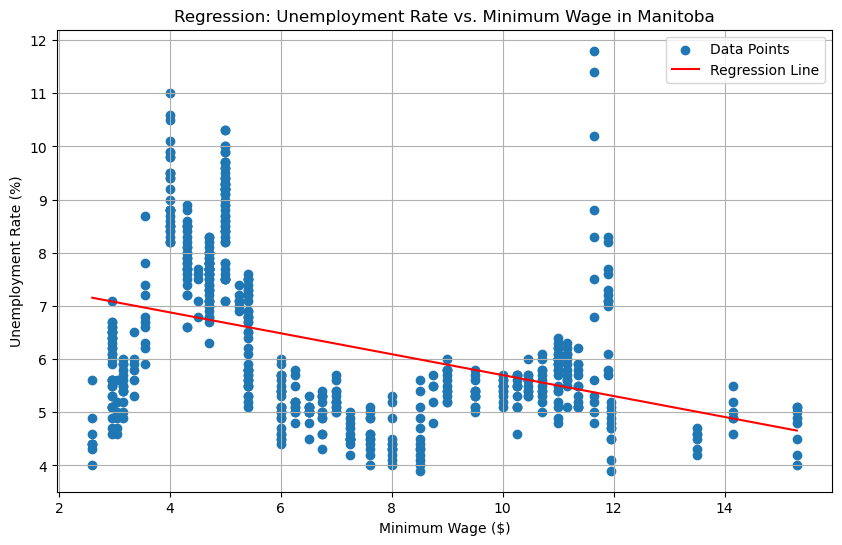

                coef  std err       t  P>|t|
const         7.6653    0.146  52.676    0.0
Minimum Wage -0.1967    0.019 -10.355    0.0


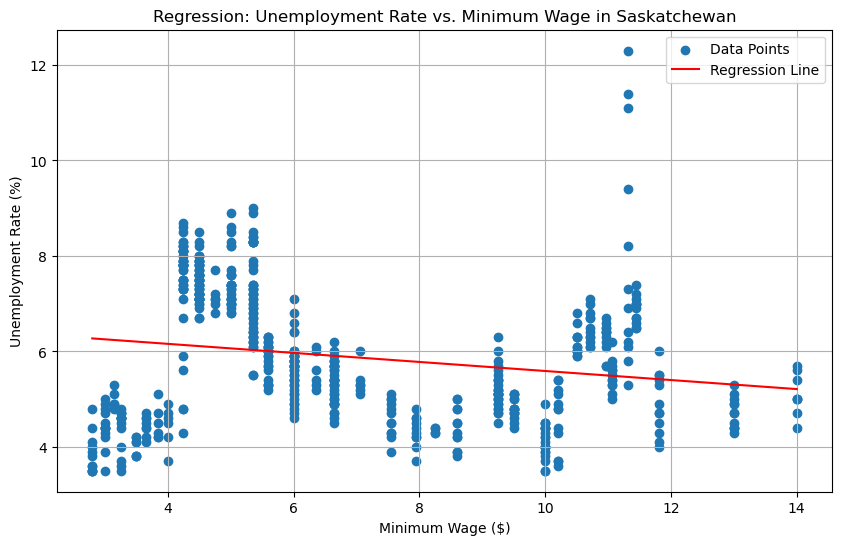

                coef  std err       t  P>|t|
const         6.5376    0.147  44.337    0.0
Minimum Wage -0.0948    0.020  -4.832    0.0


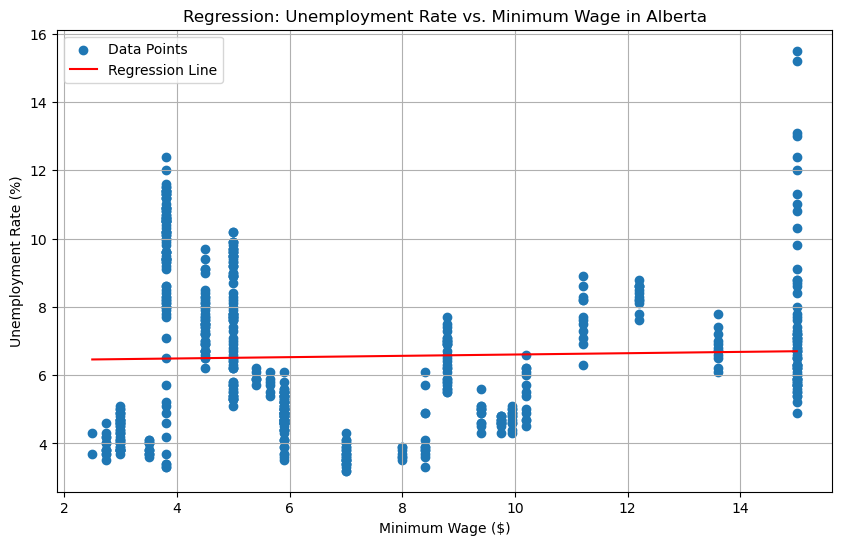

                coef  std err       t  P>|t|
const         6.4102    0.199  32.168  0.000
Minimum Wage  0.0193    0.025   0.781  0.435


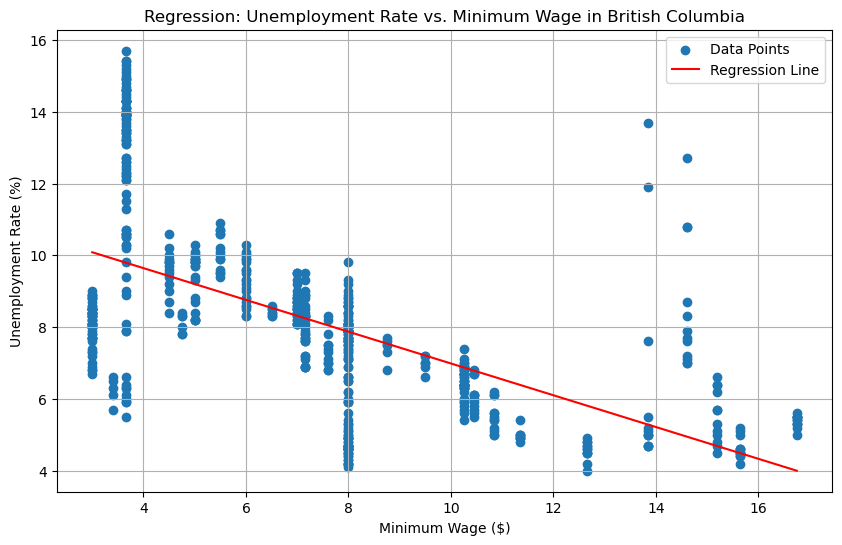

                 coef  std err       t  P>|t|
const         11.4134    0.198  57.688    0.0
Minimum Wage  -0.4426    0.024 -18.623    0.0


In [46]:
# Check fo linear relationship b/w min wage and unemployment rate for each province
# Loop through each unique province

# I will drop "Canada" values for now and fill the NaN value

regression_summaries = {}

for province in merged_data['Province_x'].unique():
    if province != 'Canada':
        province_data = merged_data[merged_data['Province_x'] == province]
        
        X = province_data['Minimum Wage']
        y = province_data['Unemployment Rate']
        
        X = sm.add_constant(X)
        
        # Fit the linear regression model
        model = sm.OLS(y, X).fit()
        
        # Plotting the regression for each province        
        plt.figure(figsize=(10, 6))
        plt.scatter(province_data['Minimum Wage'], province_data['Unemployment Rate'], label='Data Points')
        plt.plot(province_data['Minimum Wage'], model.predict(X), color='red', label='Regression Line')
        plt.xlabel('Minimum Wage ($)')
        plt.ylabel('Unemployment Rate (%)')
        plt.title('Regression: Unemployment Rate vs. Minimum Wage in ' + province)
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Save the summary to the dictionary
        regression_summaries[province] = model.summary()
        print(summarize(model))



In [40]:
# Print regression summaries
for province, summary in regression_summaries.items():
    print(f'Regression summary for {province}:')
    print(summary.tables[0], summary.tables[1], "\n")

Regression summary for Newfoundland and Labrador:
                            OLS Regression Results                            
Dep. Variable:      Unemployment Rate   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     398.1
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           8.37e-68
Time:                        20:20:05   Log-Likelihood:                -1258.1
No. Observations:                 581   AIC:                             2520.
Df Residuals:                     579   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================== ================================================================================


In [53]:
# Recalculate R-squared and P-values accurately from regression summaries
results = []

for province, summary in regression_summaries.items():
    # Extract R-squared and P-value from the regression summary
    r_squared = summary.tables[0].data[0][3]
    p_value = summary.tables[1].data[2][4]
    results.append((province, float(r_squared), float(p_value)))

# Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=['Province', 'R_squared', 'P_value'])

# Round the values for better readability
results_df['R_squared'] = results_df['R_squared'].round(3)
results_df['P_value'] = results_df['P_value'].round(3)

# tools.display_dataframe_to_user(name="Corrected Regression Analysis Results by Province", dataframe=results_df)

results_df


,Province,R_squared,P_value
0,Newfoundland and Labrador,0.407,0.000
1,Prince Edward Island,0.260,0.000
2,Nova Scotia,0.400,0.000
3,New Brunswick,0.539,0.000
4,Quebec,0.592,0.000
5,Ontario,0.017,0.002
6,Manitoba,0.156,0.000
7,Saskatchewan,0.039,0.000
8,Alberta,0.001,0.435
9,British Columbia,0.375,0.000


### Interpretation of the Results

**Summary of Findings:**

* **Statistical Significance (P-value):**
    
    * All provinces except Alberta have extremely low p-values (0.000), indicating that the relationship between minimum wage and unemployment rate is statistically significant.
    
    * Alberta has a p-value of 0.435, suggesting that there is no statistically significant relationship between minimum wage and unemployment rate in this province.

**Strength of Relationship (R-squared):**

**Interpretation of Regression Summaries**
1. Newfoundland and Labrador
    - Minimum Wage Coefficient = -0.5275: For each $1 increase in the minimum wage, the unemployment rate is expected to decrease by approximately 0.5275 percentage points.

    - R-squared = 0.407: Approximately 40.7% of the variation in the unemployment rate can be explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: The relationship is statistically significant.

    - Implication: Higher minimum wages are associated with lower unemployment rates in Newfoundland and Labrador.

2. Prince Edward Island

    - Minimum Wage Coefficient = -0.3696: A $1 increase in the minimum wage leads to a 0.3696 percentage point decrease in the unemployment rate.

    - R-squared = 0.260: 26% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages are associated with lower unemployment rates in Prince Edward Island.

3. Nova Scotia

    - Minimum Wage Coefficient = -0.3963: A $1 increase in the minimum wage leads to a 0.3963 percentage point decrease in the unemployment rate.

    - R-squared = 0.400: 40% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages are associated with lower unemployment rates in Nova Scotia.

4. New Brunswick

    - Minimum Wage Coefficient = -0.4930: A $1 increase in the minimum wage leads to a 0.4930 percentage point decrease in the unemployment rate.

    - R-squared = 0.539: 53.9% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages are associated with lower unemployment rates in New Brunswick.

5. Quebec

    - Minimum Wage Coefficient = -0.5989: A $1 increase in the minimum wage leads to a 0.5989 percentage point decrease in the unemployment rate.

    - R-squared = 0.592: 59.2% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages are associated with lower unemployment rates in Quebec.

6. Ontario

    - Minimum Wage Coefficient = -0.0571: A $1 increase in the minimum wage leads to a 0.0571 percentage point decrease in the unemployment rate.

    - R-squared = 0.017: Only 1.7% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage = 0.00172: Statistically significant relationship.

    - Implication: Higher minimum wages have a very small negative impact on unemployment rates in Ontario.

7. Manitoba

    - Minimum Wage Coefficient = -0.1967: A $1 increase in the minimum wage leads to a 0.1967 percentage point decrease in the unemployment rate.

    - R-squared = 0.156: 15.6% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages are associated with lower unemployment rates in Manitoba.

8. Saskatchewan

    - Minimum Wage Coefficient = -0.0948: A $1 increase in the minimum wage leads to a 0.0948 percentage point decrease in the unemployment rate.

    - R-squared = 0.039: Only 3.9% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages have a small negative impact on unemployment rates in Saskatchewan.

9. Alberta

    - Minimum Wage Coefficient = 0.0193: A $1 increase in the minimum wage leads to a 0.0193 percentage point increase in the unemployment rate.

    - R-squared = 0.001: Only 0.1% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage = 0.435: Not statistically significant.

    - Implication: There is no significant relationship between minimum wage and unemployment rate in Alberta.

10. British Columbia

    - Minimum Wage Coefficient = -0.4426: A $1 increase in the minimum wage leads to a 0.4426 percentage point decrease in the unemployment rate.

    - R-squared = 0.375: 37.5% of the variation in the unemployment rate is explained by the minimum wage.

    - P-value for Minimum Wage < 0.0001: Statistically significant relationship.

    - Implication: Higher minimum wages are associated with lower unemployment rates in British Columbia. 

### What These Findings Tell Us:

**Strong Negative Correlation Provinces**

- **Newfoundland and Labrador, New Brunswick, Quebec:**

    * These provinces show a strong negative correlation between minimum wage and unemployment rates, suggesting that increases in minimum wage lead to notable decreases in unemployment. This might reflect robust local economies where higher wages boost consumer spending and overall economic activity, thereby creating more jobs.


**Moderate Negative Correlation Provinces**

- **Prince Edward Island, Nova Scotia, Manitoba, British Columbia:**

    - These provinces also exhibit a negative correlation, though to a lesser extent. The decrease in unemployment rates with higher minimum wages indicates beneficial effects, albeit less pronounced compared to the strong correlation provinces.


**Weak Negative Correlation Provinces**

- **Ontario, Saskatchewan:** 
    - The weak negative correlations suggest that while higher minimum wages slightly reduce unemployment rates, the impact is minimal. This could be due to diverse economic activities and employment structures that dilute the direct effect of wage increases.


**No Significant Correlation**

- **Alberta:** 
    - The lack of significant correlation in Alberta indicates that other factors overshadow the influence of minimum wage on unemployment rates. Alberta's economy, heavily influenced by the oil and gas industry, might have unique dynamics that decouple minimum wage changes from unemployment rates.

### Economic Insights:

**Economic Context**

The variation in the relationship between minimum wage and unemployment across provinces can be attributed to several factors:

- **Economic Structure:** Provinces with diversified economies might absorb wage increases differently compared to those reliant on specific industries.

- **Labor Market Dynamics:** Local labor market conditions, including the presence of unionized workforces, prevalent industries, and employment policies, can influence how minimum wage changes affect unemployment.

- **Cost of Living:** Regions with higher living costs might see more substantial benefits from increased minimum wages as workers' purchasing power improves, potentially boosting local economies.


### Conclusion

The analysis reveals that in most provinces, higher minimum wages are associated with lower unemployment rates, suggesting positive economic impacts. However, the extent of this relationship varies significantly, influenced by local economic conditions and industry structures. Alberta stands out with no significant correlation, highlighting the importance of considering regional economic contexts when evaluating the effects of minimum wage policies.

Whether higher minimum wages are "good" or "bad" depends on the balance between the positive impacts on worker incomes and economic demand, and the potential challenges faced by businesses and specific sectors. Policymakers need to consider these factors and regional economic conditions when setting minimum wage levels to maximize the benefits and minimize potential downsides.